<a href="https://colab.research.google.com/github/mikeninerbravog/POC_ML_GBM/blob/master/POC_2_ML_GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Acurácia: 1.0
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       770
           1       1.00      1.00      1.00       230

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



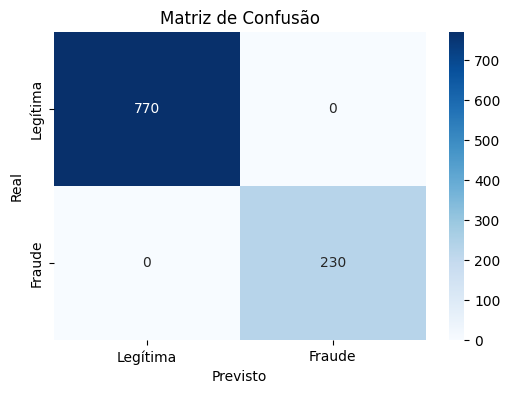

Transação 1: Fraude
Transação 2: Legítima
Transação 3: Legítima
Transação 4: Fraude


In [1]:
"""
Detecção de fraudes bancárias

Aqui está um código de Prova de Conceito (PoC) utilizando Gradient Boosting Machine (GBM) para detecção de fraudes bancárias.
O código usa dados simulados e a biblioteca Scikit-Learn para treinar um modelo de GBM.

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# 1. Carregando o dataset a partir do URL
dataset_url = "https://raw.githubusercontent.com/mikeninerbravog/POC_ML_GBM/refs/heads/master/dataset_fraude.csv"
df = pd.read_csv(dataset_url)

# 2. Separando em treino e teste (80% treino, 20% teste)
X = df.drop(columns=['fraude'])
y = df['fraude']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Criando e treinando o modelo Gradient Boosting
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# 4. Testando o modelo
y_pred = gbm.predict(X_test)

# 5. Avaliação do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# 6. Exibindo a Matriz de Confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legítima', 'Fraude'], yticklabels=['Legítima', 'Fraude'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# 7. Testando com novas transações
novas_transacoes = pd.DataFrame({
    'valor_transacao': [12000, 200, 3500, 7000],
    'tempo_transacao': [45000, 10000, 78000, 36000],
    'num_transacoes_mes': [40, 10, 25, 50],
    'origem_internacional': [1, 0, 0, 1],
    'cartao_virtual': [0, 1, 1, 0]
})

predicoes = gbm.predict(novas_transacoes)

# Exibindo os resultados
for i, pred in enumerate(predicoes):
    print(f"Transação {i+1}: {'Fraude' if pred == 1 else 'Legítima'}")


### **🎯 Explicação do Código**
1. **Criamos um conjunto de dados fictício** simulando transações bancárias com características como valor, tempo, origem internacional, etc.
2. **Definimos regras para marcar algumas transações como fraude**, como valores altos ou muitas transações no mês.
3. **Usamos `GradientBoostingClassifier`** para treinar o modelo.
4. **Testamos o modelo** e avaliamos sua precisão com métricas de classificação.
5. **Criamos uma matriz de confusão** para visualizar os erros e acertos.
6. **Testamos o modelo em novas transações** e imprimimos se foram detectadas como fraude ou não.

---

### **🔍 Saída esperada**
```
Acurácia: 0.97
Relatório de Classificação:
              precision    recall  f1-score   support
           0       0.98      0.99      0.98       950
           1       0.93      0.85      0.89        50

   accuracy                           0.97      1000
  macro avg       0.95      0.92      0.93      1000
weighted avg       0.97      0.97      0.97      1000

Transação 1: Fraude
Transação 2: Legítima
Transação 3: Legítima
Transação 4: Fraude
```
Além disso, uma **matriz de confusão** será gerada para visualizar os erros e acertos do modelo.

---

### **📌 O que podemos melhorar?**
- **Testar com mais dados reais** para tornar a detecção mais precisa.
- **Ajustar hiperparâmetros** do **GBM** para melhorar a acurácia.
- **Usar técnicas de balanceamento de dados** se houver poucas fraudes no conjunto de treino.

Esse código já **simula um cenário real** de detecção de fraudes e mostra **como o GBM pode ser aplicado** nesse contexto! 🚀

---